In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
%matplotlib inline

#### Loading the dataset

In [2]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### EDA

In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
# there is no null value in the dataset

In [6]:
df.duplicated().sum()

0

In [7]:
# there is no duplicate value in the dataset
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


#### converting the categorical column into the  numerical using get dummies

In [8]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])

In [9]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


##### so according to the problem statement whose taxable income is less than 30000 considered as Risky and rest other consider as Good

In [10]:
# giving the labels to the value

In [11]:
condition = df.iloc[:,0] <= 30000
df['Taxable.Income']=np.where(condition,'Risky','Good')

In [12]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0


In [ ]:
df.head()

#### Splitting the data into training and testing part

In [16]:
x=df.iloc[:,1:]
y=df['Taxable.Income']

#### converting the categorical column (Taxable.Income) into the numerical using label encoder

In [17]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
df['Taxable.Income']=y

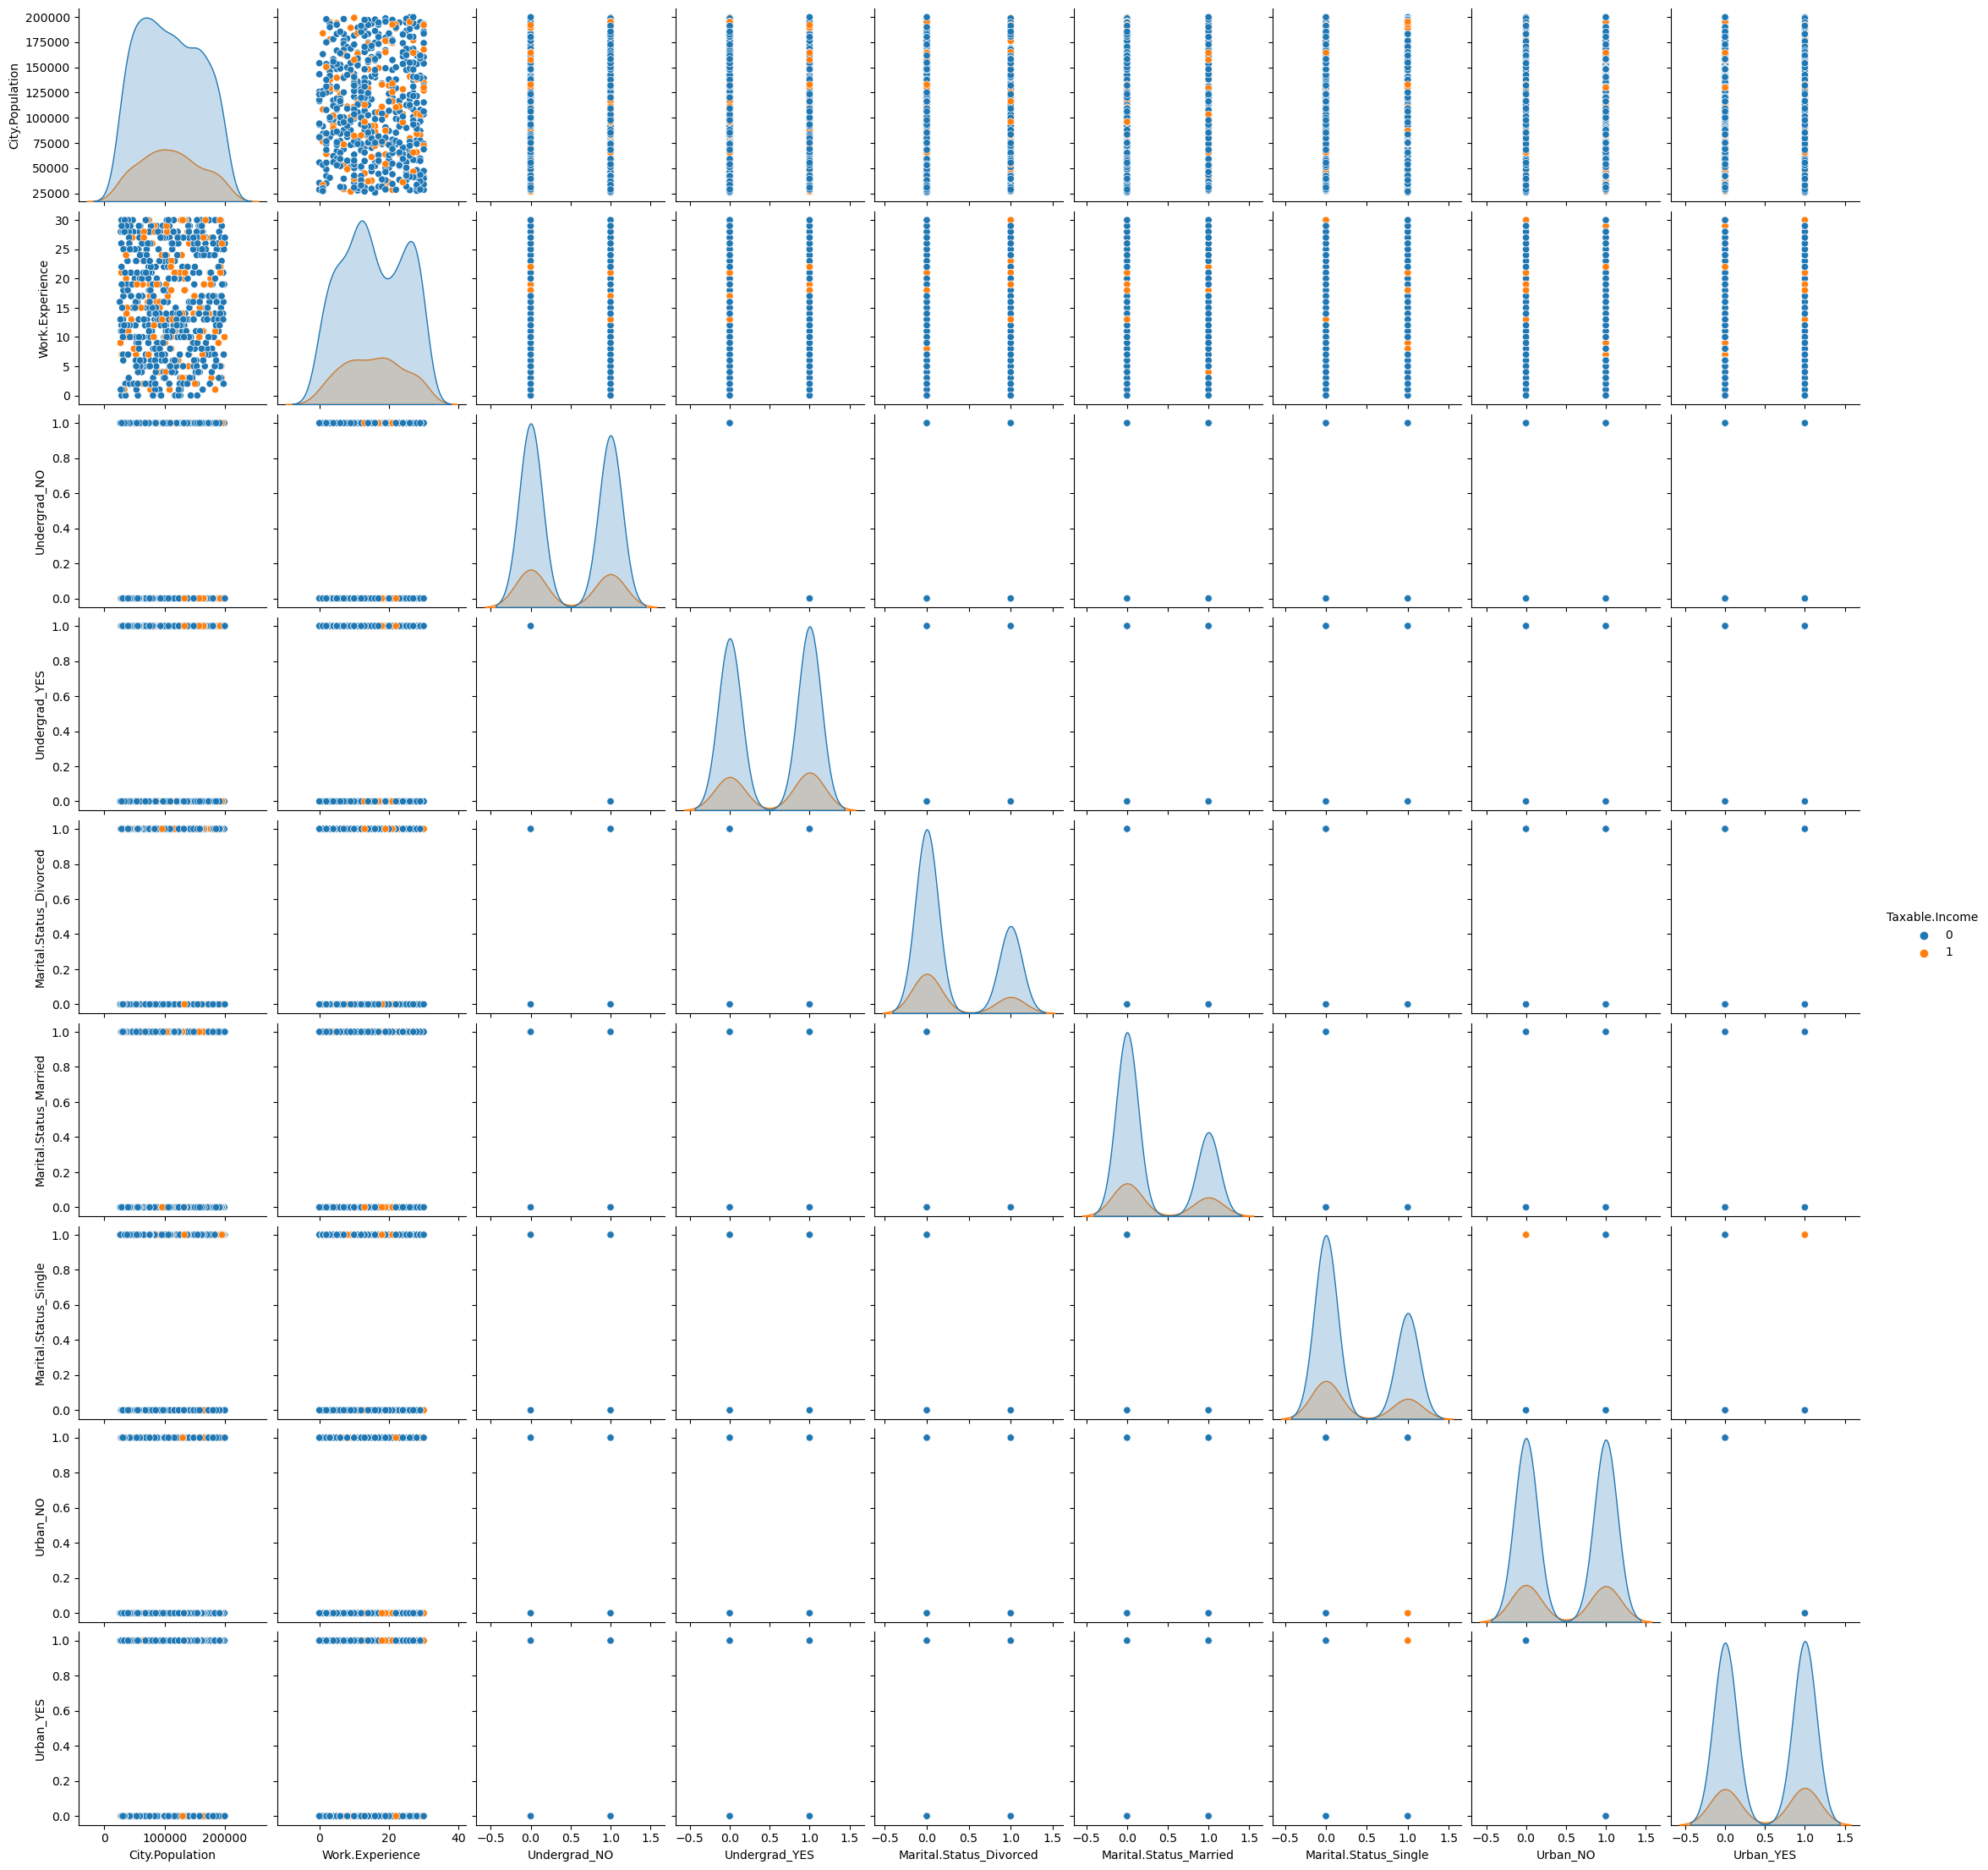

In [22]:
sns.pairplot(data=df, hue ='Taxable.Income')

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)

In [ ]:
ypred=dt.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
print('Trainig Accuracy',dt.score(xtrain,ytrain))
print('Testing Accuracy',dt.score(xtest,ytest))

In [ ]:
# so there is 40 % difference between training and testing accuracy so this is overfitted model

#### Hyperparameter Tuning

In [ ]:
param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,7]
}

In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=param,verbose=1)

In [ ]:
grid.fit(xtrain,ytrain)

In [ ]:
grid.best_params_

### Final Model

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)

In [ ]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [ ]:
print('Trainig Accuracy',dt.score(xtrain,ytrain))
print('Testing Accuracy',dt.score(xtest,ytest))

In [ ]:
# so after doing hyperparameter tuning the testing accuracy increase to 80 % 

### Visualize the tree

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=300

In [ ]:
tree.plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()